In [361]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gamma
from scipy.special import gamma as gamma_

In [362]:
N = 50
points = norm(0, 1).rvs(size=N)

In [363]:
mu_interval = [-2, 2]
sigma_interval = [0.1, 2]

In [364]:
alpha = N / 2
lambda_ = N
m = points.mean()
beta = sum(i ** 2 for i in points) / 2

def posterior(mu, sigma):
    lhs = (beta ** alpha * np.sqrt(lambda_)) / (gamma_(alpha) * np.sqrt(2 * np.pi))
    mhs = sigma ** (alpha - 1/2) * np.exp(-beta * sigma)
    rhs = np.exp(-(lambda_ * sigma * (mu - m) ** 2) / 2)
    return lhs * mhs * rhs

In [778]:
interval_size = 1000
x = np.linspace(*(mu_interval + [interval_size]))
y = np.linspace(*(sigma_interval + [interval_size]))
X, Y = np.meshgrid(x, y)

In [779]:
Z = posterior(X, Y)

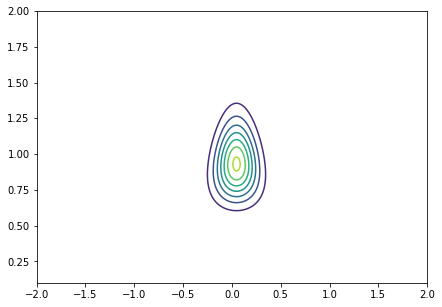

In [780]:
plt.figure(figsize=(7, 5))
plt.contour(X, Y, Z)
plt.show()

In [767]:
E_q_mu = points.mean()
x_2 = np.sum(points ** 2)
E_q_sigma = 1
for i in range(1000):
    E_q_mu_2 = E_q_mu ** 2 + 1 / (N * E_q_sigma) 
    E_q_sigma = 1 / (x_2 - 2 * E_q_mu ** 2  + E_q_mu_2)

In [818]:
E_q_mu, E_q_sigma, E_q_mu_2

(0.0473996826824652, 0.018595794304359165, 1.0777587340123382)

In [819]:
x_ = points.mean()
lambda_0 = mu_0 = a_0 = b_0 = 0

In [820]:
mu_n = (lambda_0 * mu_0 + N * x_) / (lambda_0 + N)
lambda_n = (lambda_0 + N) * E_q_sigma

In [821]:
log_q_mu = norm(mu_n, 1/lambda_n)
q_mu = lambda x: np.exp(log_q_mu.pdf(x))

In [822]:
np.exp(log_q_mu.rvs())

0.9190439424596696

In [823]:
a_n = a_0 + N / 2
b_n = b_0 + (1 / 2) * ((np.sum(points ** 2) - 2 * np.sum(points) * E_q_mu + E_q_mu_2))

In [824]:
log_q_sigma = gamma(a_n, scale=1 / b_n)
q_sigma = lambda x: np.exp(log_q_sigma.pdf(x))

In [825]:
qs = lambda mu, sigma: q_mu(mu) * q_sigma(sigma)

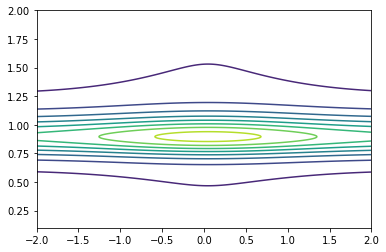

In [826]:
interval_size = 1000
x1 = np.linspace(*(mu_interval + [interval_size]))
y1 = np.linspace(*(sigma_interval + [interval_size]))
X1, Y1 = np.meshgrid(x, y)
Z1 = qs(X1, Y1)
plt.contour(X1, Y1, Z1)
plt.show()

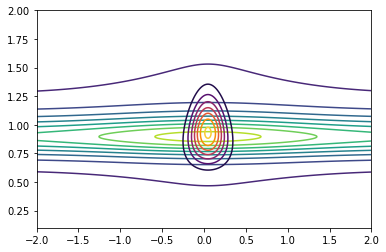

In [827]:
interval_size = 1000
x1 = np.linspace(*(mu_interval + [interval_size]))
y1 = np.linspace(*(sigma_interval + [interval_size]))
X1, Y1 = np.meshgrid(x, y)
Z1 = qs(X1, Y1)
plt.contour(X1, Y1, Z1)
plt.contour(X, Y, Z, cmap=plt.cm.inferno)
plt.show()